In [1]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

/home/deadshot/GitHub/timeseries-forecasting-hub/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

In [3]:
# Define the parameter grid
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5],
    'seasonality_prior_scale': [1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative']
}
grid = list(ParameterGrid(param_grid))

# Define TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)

# Store best result
best_mape = np.inf
best_params = None

In [4]:

# Grid search with TimeSeriesSplit
for params in grid:
    mape_scores = []
    
    for train_index, val_index in tscv.split(df):
        train_df = df.iloc[train_index]
        val_df = df.iloc[val_index]
        
        model = Prophet(
            changepoint_prior_scale=params['changepoint_prior_scale'],
            seasonality_prior_scale=params['seasonality_prior_scale'],
            seasonality_mode=params['seasonality_mode'],
            yearly_seasonality=True,
            weekly_seasonality=False,
            daily_seasonality=False
        )
        model.fit(train_df)
        
        future = model.make_future_dataframe(periods=len(val_df), freq='MS')
        forecast = model.predict(future)
        
        forecast = forecast.set_index('ds').loc[val_df['ds'], 'yhat']
        y_true = val_df.set_index('ds')['y']
        y_pred = forecast
        
        mape = mean_absolute_percentage_error(y_true, y_pred)
        mape_scores.append(mape)
    
    avg_mape = np.mean(mape_scores)
    print(f"Params: {params}, Avg MAPE: {avg_mape:.4f}")
    
    if avg_mape < best_mape:
        best_mape = avg_mape
        best_params = params

# Show best parameters
print("\n✅ Best Params:", best_params)
print("✅ Best Avg MAPE:", best_mape)


11:20:15 - cmdstanpy - INFO - Chain [1] start processing
11:20:16 - cmdstanpy - INFO - Chain [1] done processing
11:20:16 - cmdstanpy - INFO - Chain [1] start processing
11:20:16 - cmdstanpy - INFO - Chain [1] done processing
11:20:16 - cmdstanpy - INFO - Chain [1] start processing
11:20:16 - cmdstanpy - INFO - Chain [1] done processing
11:20:17 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0773


11:20:17 - cmdstanpy - INFO - Chain [1] done processing
11:20:17 - cmdstanpy - INFO - Chain [1] start processing
11:20:17 - cmdstanpy - INFO - Chain [1] done processing
11:20:18 - cmdstanpy - INFO - Chain [1] start processing
11:20:18 - cmdstanpy - INFO - Chain [1] done processing
11:20:18 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0774


11:20:18 - cmdstanpy - INFO - Chain [1] done processing
11:20:18 - cmdstanpy - INFO - Chain [1] start processing
11:20:18 - cmdstanpy - INFO - Chain [1] done processing
11:20:18 - cmdstanpy - INFO - Chain [1] start processing
11:20:19 - cmdstanpy - INFO - Chain [1] done processing
11:20:19 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0731


11:20:19 - cmdstanpy - INFO - Chain [1] done processing
11:20:19 - cmdstanpy - INFO - Chain [1] start processing
11:20:19 - cmdstanpy - INFO - Chain [1] done processing
11:20:19 - cmdstanpy - INFO - Chain [1] start processing
11:20:19 - cmdstanpy - INFO - Chain [1] done processing
11:20:20 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0739


11:20:20 - cmdstanpy - INFO - Chain [1] done processing
11:20:20 - cmdstanpy - INFO - Chain [1] start processing
11:20:21 - cmdstanpy - INFO - Chain [1] done processing
11:20:21 - cmdstanpy - INFO - Chain [1] start processing
11:20:21 - cmdstanpy - INFO - Chain [1] done processing
11:20:21 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0987


11:20:22 - cmdstanpy - INFO - Chain [1] done processing
11:20:22 - cmdstanpy - INFO - Chain [1] start processing
11:20:22 - cmdstanpy - INFO - Chain [1] done processing
11:20:22 - cmdstanpy - INFO - Chain [1] start processing
11:20:22 - cmdstanpy - INFO - Chain [1] done processing
11:20:22 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0984


11:20:23 - cmdstanpy - INFO - Chain [1] done processing
11:20:23 - cmdstanpy - INFO - Chain [1] start processing
11:20:24 - cmdstanpy - INFO - Chain [1] done processing
11:20:24 - cmdstanpy - INFO - Chain [1] start processing
11:20:24 - cmdstanpy - INFO - Chain [1] done processing
11:20:24 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.0862


11:20:24 - cmdstanpy - INFO - Chain [1] done processing
11:20:24 - cmdstanpy - INFO - Chain [1] start processing
11:20:25 - cmdstanpy - INFO - Chain [1] done processing
11:20:25 - cmdstanpy - INFO - Chain [1] start processing
11:20:25 - cmdstanpy - INFO - Chain [1] done processing
11:20:25 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.0866


11:20:40 - cmdstanpy - INFO - Chain [1] done processing
11:20:40 - cmdstanpy - INFO - Chain [1] start processing
11:20:40 - cmdstanpy - INFO - Chain [1] done processing
11:20:41 - cmdstanpy - INFO - Chain [1] start processing
11:20:41 - cmdstanpy - INFO - Chain [1] done processing
11:20:41 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.1744


11:20:55 - cmdstanpy - INFO - Chain [1] done processing
11:20:55 - cmdstanpy - INFO - Chain [1] start processing
11:20:55 - cmdstanpy - INFO - Chain [1] done processing
11:20:55 - cmdstanpy - INFO - Chain [1] start processing
11:20:55 - cmdstanpy - INFO - Chain [1] done processing
11:20:56 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.2002


11:21:09 - cmdstanpy - INFO - Chain [1] done processing
11:21:09 - cmdstanpy - INFO - Chain [1] start processing
11:21:10 - cmdstanpy - INFO - Chain [1] done processing
11:21:10 - cmdstanpy - INFO - Chain [1] start processing
11:21:10 - cmdstanpy - INFO - Chain [1] done processing
11:21:10 - cmdstanpy - INFO - Chain [1] start processing


Params: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}, Avg MAPE: 0.1287


11:21:24 - cmdstanpy - INFO - Chain [1] done processing
11:21:24 - cmdstanpy - INFO - Chain [1] start processing
11:21:25 - cmdstanpy - INFO - Chain [1] done processing
11:21:25 - cmdstanpy - INFO - Chain [1] start processing
11:21:25 - cmdstanpy - INFO - Chain [1] done processing


Params: {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}, Avg MAPE: 0.1377

✅ Best Params: {'changepoint_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
✅ Best Avg MAPE: 0.07311542207797515


In [5]:
# Train final model on full data with best params
final_model = Prophet(
    changepoint_prior_scale=best_params['changepoint_prior_scale'],
    seasonality_prior_scale=best_params['seasonality_prior_scale'],
    seasonality_mode=best_params['seasonality_mode'],
    yearly_seasonality=True
)
final_model.fit(df)

11:21:25 - cmdstanpy - INFO - Chain [1] start processing
11:21:25 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# Forecast future
future = final_model.make_future_dataframe(periods=12, freq='MS')
forecast = final_model.predict(future)

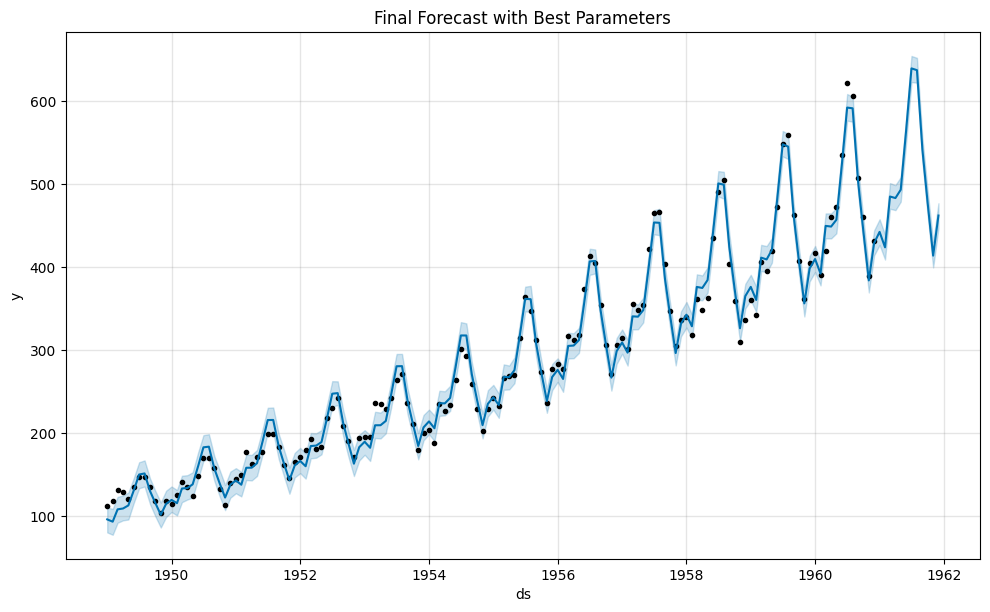

In [7]:
# Plot results
final_model.plot(forecast)
plt.title('Final Forecast with Best Parameters')
plt.show()